In [1]:
!pip install opencv-python

  Using cached opencv_python-4.6.0.66-cp36-abi3-win_amd64.whl (35.6 MB)


In [2]:
!pip install mediapipe --user

     ---------------------------------------- 49.0/49.0 MB 5.5 MB/s eta 0:00:00
     ---------------------------------------- 7.2/7.2 MB 11.2 MB/s eta 0:00:00
     -------------------------------------- 904.2/904.2 kB 9.6 MB/s eta 0:00:00
  Using cached opencv_contrib_python-4.6.0.66-cp36-abi3-win_amd64.whl (42.5 MB)
  Using cached absl_py-1.3.0-py3-none-any.whl (124 kB)
     ---------------------------------------- 2.5/2.5 MB 11.3 MB/s eta 0:00:00
     ------------------------------------- 965.4/965.4 kB 12.2 MB/s eta 0:00:00
     ---------------------------------------- 55.4/55.4 kB 2.8 MB/s eta 0:00:00
     -------------------------------------- 161.3/161.3 kB 4.9 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [4]:
import sys

In [7]:
sys.path.append('C:\\Users\\Pravin Vijay\\AppData\\Roaming\\Python\\Python39\\Scripts')

In [1]:
import mediapipe as mp

In [2]:
import numpy as np

In [3]:
import cv2 as cv

In [4]:
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

In [6]:
cap = cv.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    cv.imshow('test', frame)
    
    if cv.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv.destroyAllWindows()

# Bicep Trainer - Pose Landmarks

In [7]:
def calculate_angle(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Mid
    c = np.array(c) # End
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle >180.0:
        angle = 360-angle
        
    return angle 

In [11]:

cap = cv.VideoCapture(0)
counter = 0 
stage = None

## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        try:
            landmarks = results.pose_landmarks.landmark
            print(landmarks)
        except:
            pass
        
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv.cvtColor(image, cv.COLOR_RGB2BGR)
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv.imshow('Mediapipe Feed', image)

        if cv.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv.destroyAllWindows()

[x: 0.2594410181045532
y: 0.5099184513092041
z: -1.7085545063018799
visibility: 0.9969327449798584
, x: 0.3120037615299225
y: 0.4188249409198761
z: -1.625954270362854
visibility: 0.9962169528007507
, x: 0.3478035032749176
y: 0.4179423153400421
z: -1.6266018152236938
visibility: 0.9961308240890503
, x: 0.37927788496017456
y: 0.4177292585372925
z: -1.6267759799957275
visibility: 0.996514081954956
, x: 0.21832963824272156
y: 0.419802188873291
z: -1.5862449407577515
visibility: 0.9956574440002441
, x: 0.19049733877182007
y: 0.4203243851661682
z: -1.5848033428192139
visibility: 0.994854748249054
, x: 0.16407743096351624
y: 0.4215899109840393
z: -1.5851489305496216
visibility: 0.9948933124542236
, x: 0.4273518919944763
y: 0.4544815421104431
z: -0.9914458394050598
visibility: 0.9969357252120972
, x: 0.1303020715713501
y: 0.4628564119338989
z: -0.759878396987915
visibility: 0.9955154061317444
, x: 0.32043224573135376
y: 0.6190600991249084
z: -1.467724323272705
visibility: 0.9947401881217957
, 

In [12]:
shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

In [13]:
cap = cv.VideoCapture(0)
counter = 0 
stage = None

## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv.cvtColor(image, cv.COLOR_RGB2BGR)
        
        try:
            landmarks = results.pose_landmarks.landmark
            
            # Get coordinates
            shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            
            # Calculate angle
            angle = calculate_angle(shoulder, elbow, wrist)
            
            # Visualize angle
            cv.putText(image, str(angle), 
                           tuple(np.multiply(elbow, [640, 480]).astype(int)), 
                           cv.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv.LINE_AA
                               )
             # Curl counter logic
            if angle > 160:
                stage = "down"
            if angle < 30 and stage =='down':
                stage="up"
                counter +=1
                                
        except:
            pass
        
        cv.rectangle(image, (0,0), (225,73), (245,117,16), -1)
        
        # Rep data
        cv.putText(image, 'REPS', (15,12), 
                    cv.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv.LINE_AA)
        cv.putText(image, str(counter), 
                    (10,60), 
                    cv.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv.LINE_AA)
        
        # Stage data
        cv.putText(image, 'STAGE', (65,12), 
                    cv.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv.LINE_AA)
        cv.putText(image, stage, 
                    (60,60), 
                    cv.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv.LINE_AA)
        
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv.imshow('Mediapipe Feed', image)

        if cv.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv.destroyAllWindows()

In [14]:
calculate_angle(shoulder, elbow, wrist)

11.373807636117395

# POSE 3d World Landmarks

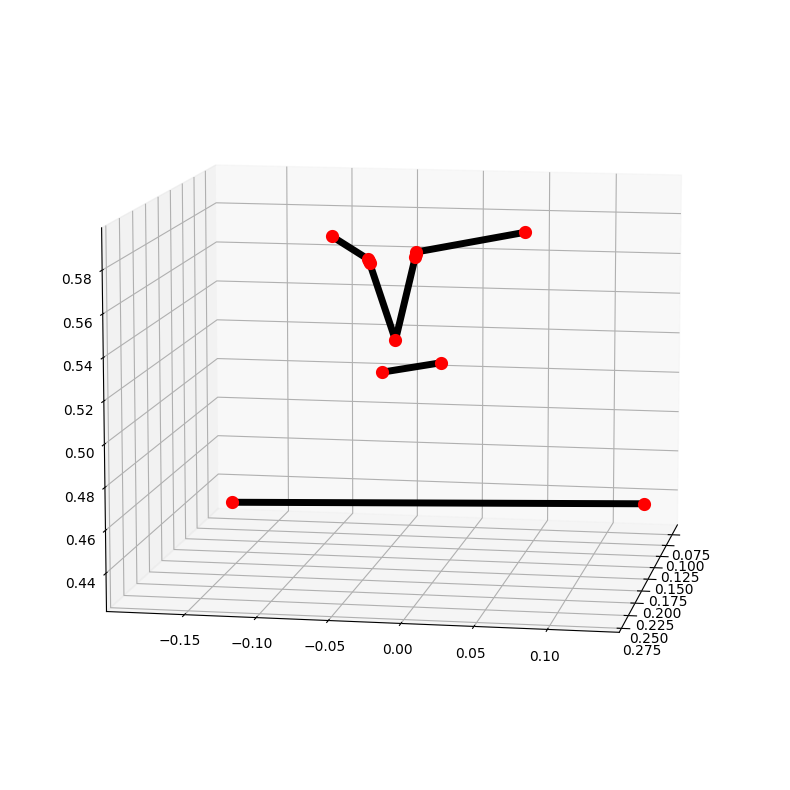

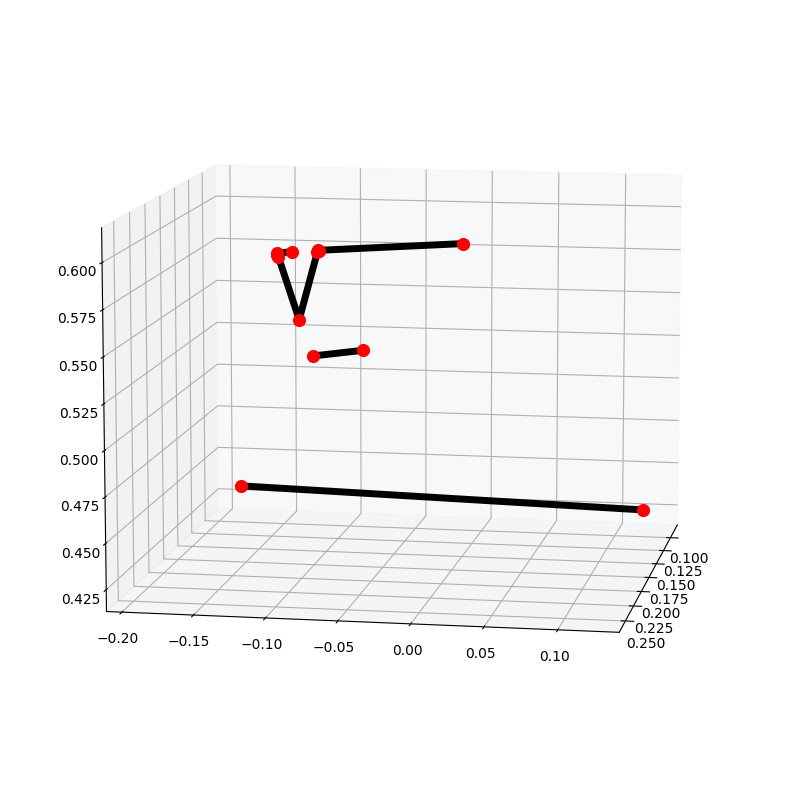

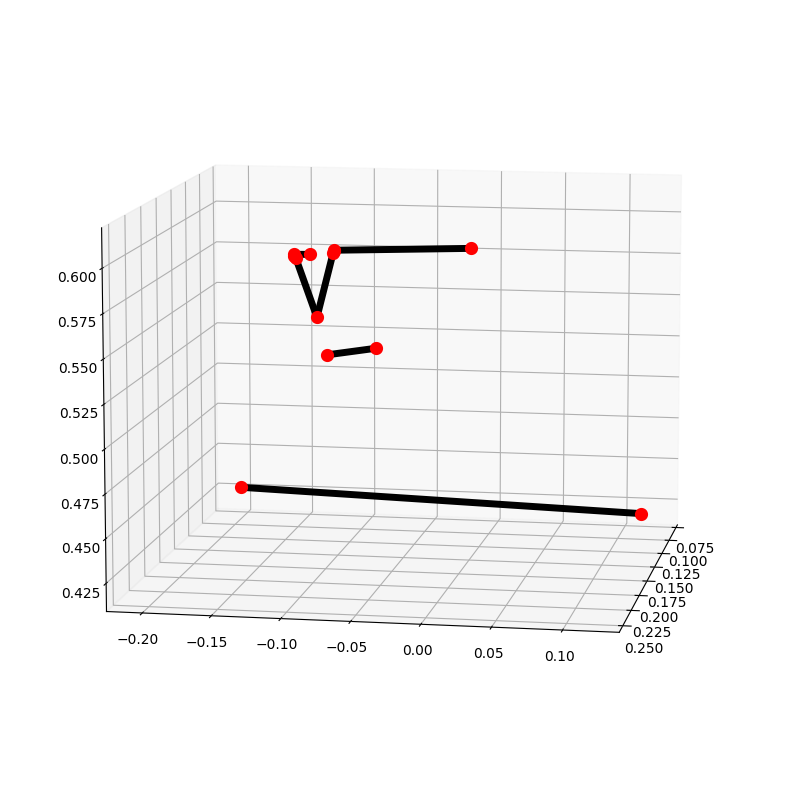

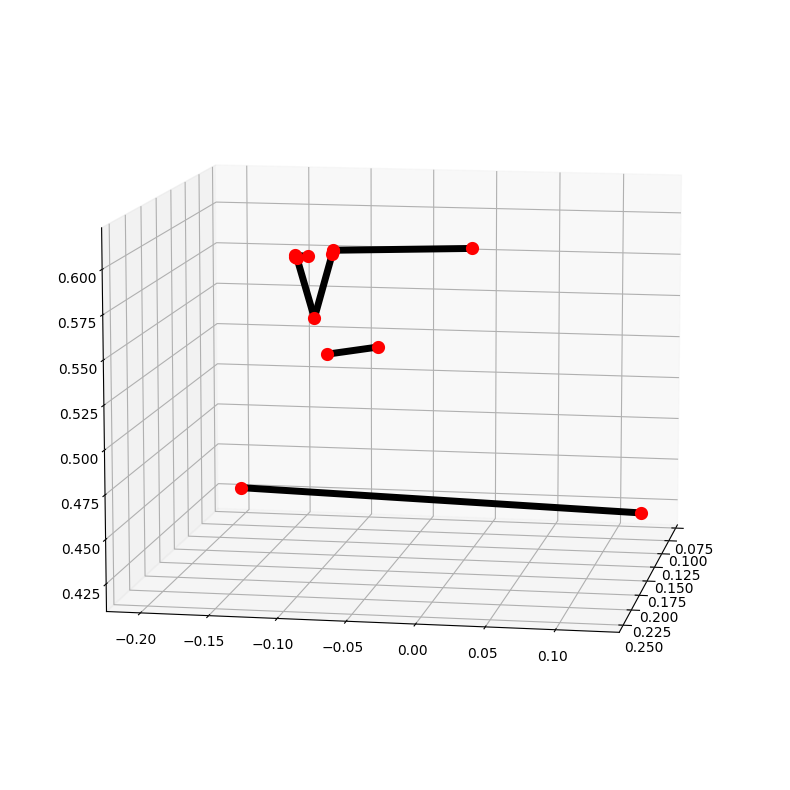

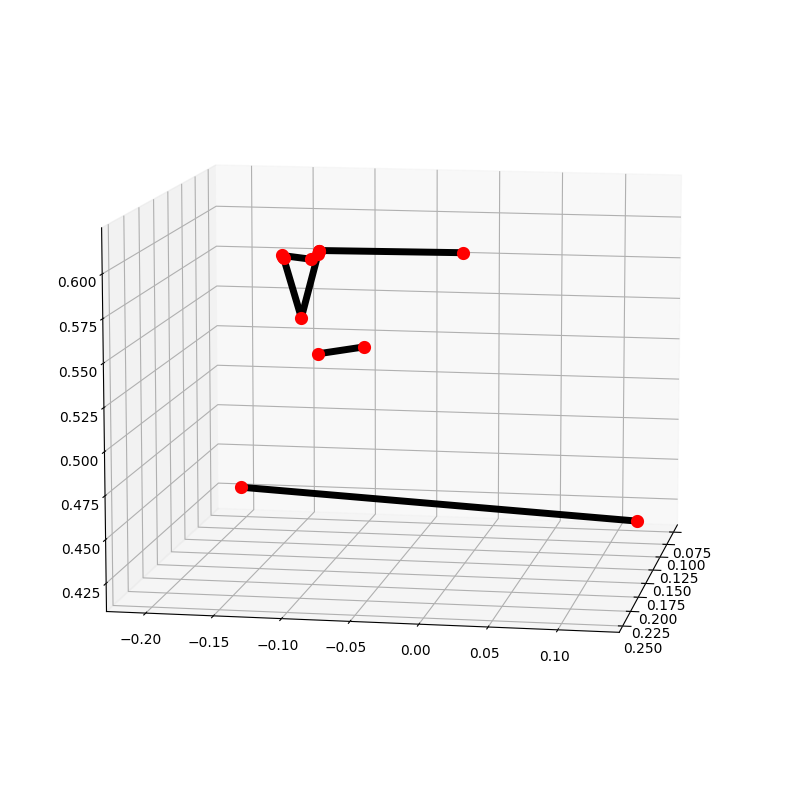

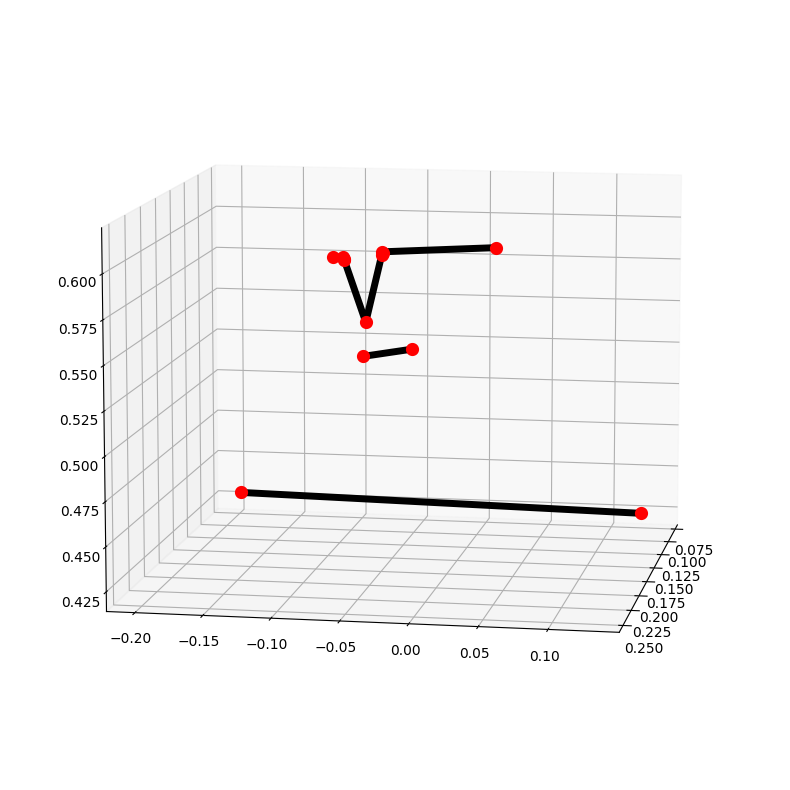

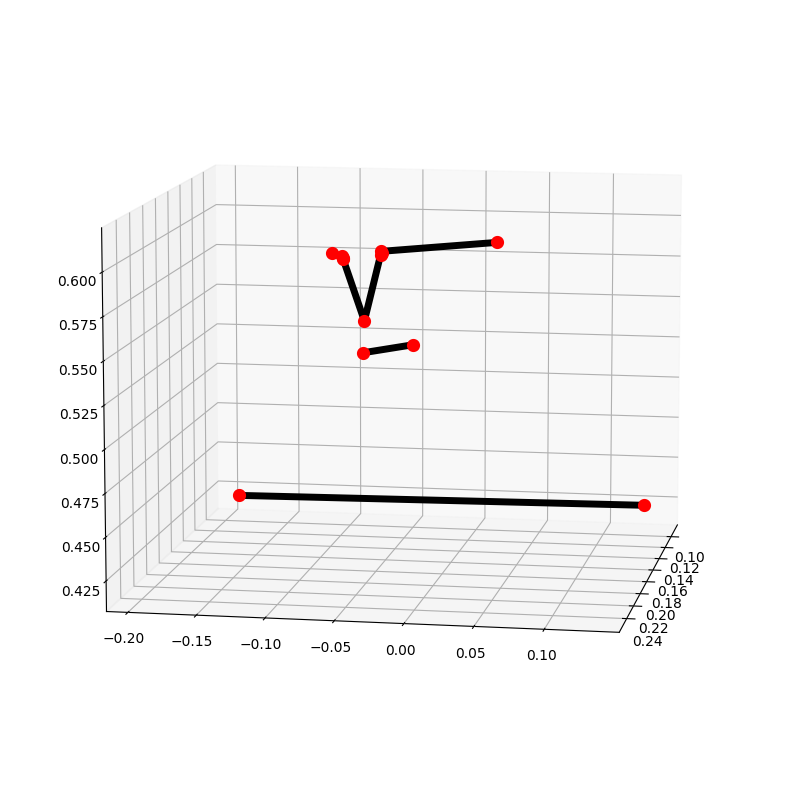

In [15]:
cap = cv.VideoCapture(0)
## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv.cvtColor(image, cv.COLOR_RGB2BGR)
        
        try:
            landmarks_pose = results.pose_landmarks.landmark
            landmarks_world = results.pose_world_landmarks
                     
            
        except:
            pass
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               

        mp_drawing.plot_landmarks(
        results.pose_world_landmarks,  mp_pose.POSE_CONNECTIONS)
        
        
        cv.imshow('Mediapipe Feed', image)

        if cv.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv.destroyAllWindows()

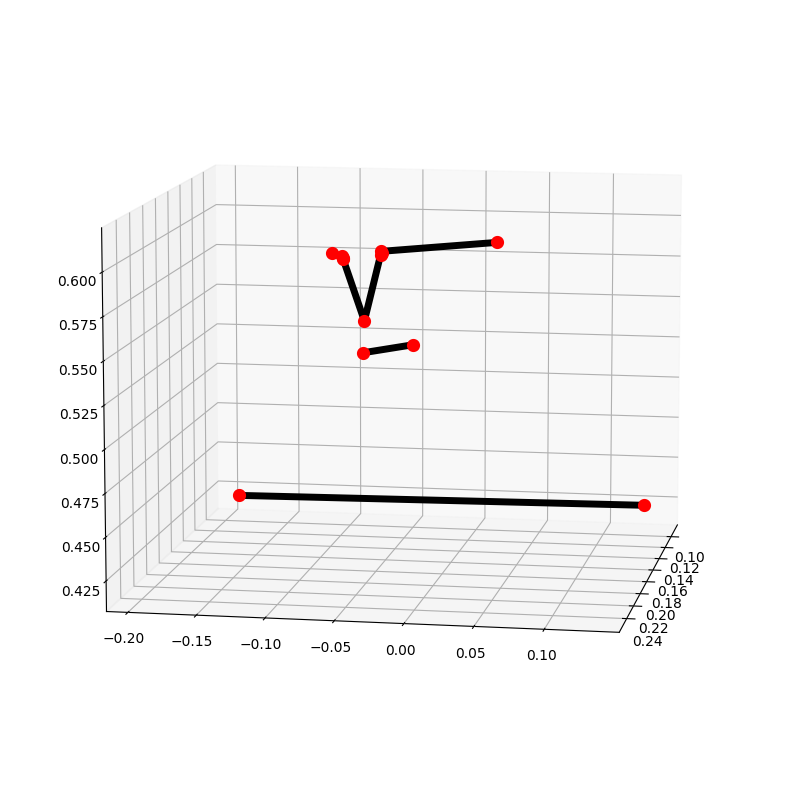

In [16]:
mp_drawing.plot_landmarks(
        results.pose_world_landmarks,  mp_pose.POSE_CONNECTIONS)

In [18]:
!pip install matplotlib

In [19]:
from mpl_toolkits import mplot3d

In [20]:
import matplotlib.pyplot as plt

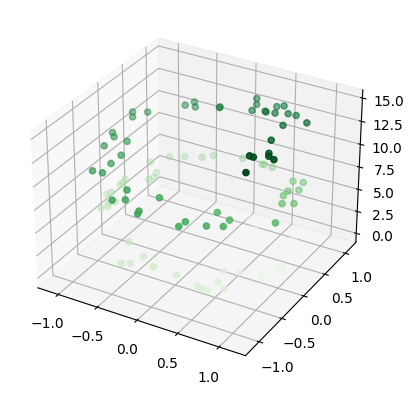

In [21]:
fig = plt.figure()
ax = plt.axes(projection='3d')

zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

In [67]:
a,b = plot_world_landmarks(
    plt,
    ax,
    landmarks_world,
    visibility_th=0.5,
)

a,b

(<module 'matplotlib.pyplot' from 'C:\\Users\\Pravin Vijay\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x271ecfb9148>)

In [110]:
a

<module 'matplotlib.pyplot' from 'C:\\Users\\Pravin Vijay\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

# Mediapipe Key Pose 3D Graph Improvements

In [22]:
from collections import deque
import cv2 as cv


class CvFpsCalc(object):
    def __init__(self, buffer_len=1):
        self._start_tick = cv.getTickCount()
        self._freq = 1000.0 / cv.getTickFrequency()
        self._difftimes = deque(maxlen=buffer_len)

    def get(self):
        current_tick = cv.getTickCount()
        different_time = (current_tick - self._start_tick) * self._freq
        self._start_tick = current_tick

        self._difftimes.append(different_time)

        fps = 1000.0 / (sum(self._difftimes) / len(self._difftimes))
        fps_rounded = round(fps, 2)

        return fps_rounded

In [25]:
import matplotlib.animation as animation

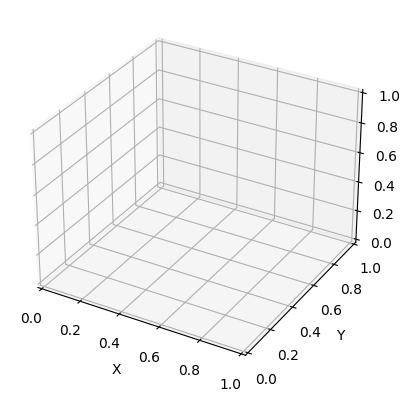

In [26]:
# Fixing random state for reproducibility
np.random.seed(19680801)


def random_walk(num_steps, max_step=0.05):
    """Return a 3D random walk as (num_steps, 3) array."""
    start_pos = np.random.random(3)
    steps = np.random.uniform(-max_step, max_step, size=(num_steps, 3))
    walk = start_pos + np.cumsum(steps, axis=0)
    return walk


def update_lines(num, walks, lines):
    for line, walk in zip(lines, walks):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(walk[:num, :2].T)
        line.set_3d_properties(walk[:num, 2])
    return lines


# Data: 40 random walks as (num_steps, 3) arrays
num_steps = 30
walks = [random_walk(num_steps) for index in range(40)]

# Attaching 3D axis to the figure
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

# Create lines initially without data
lines = [ax.plot([], [], [])[0] for _ in walks]

# Setting the axes properties
ax.set(xlim3d=(0, 1), xlabel='X')
ax.set(ylim3d=(0, 1), ylabel='Y')
ax.set(zlim3d=(0, 1), zlabel='Z')

# Creating the Animation object
ani = animation.FuncAnimation(
    fig, update_lines, num_steps, fargs=(walks, lines), interval=100)

plt.show()

In [23]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
import copy
import argparse


def get_args():
    parser = argparse.ArgumentParser()

    parser.add_argument("--device", type=int, default=0)
    parser.add_argument("--width", help='cap width', type=int, default=960)
    parser.add_argument("--height", help='cap height', type=int, default=540)

    # parser.add_argument('--upper_body_only', action='store_true')  # 0.8.3 or less
    parser.add_argument("--model_complexity",
                        help='model_complexity(0,1(default),2)',
                        type=int,
                        default=1)
    parser.add_argument("--min_detection_confidence",
                        help='min_detection_confidence',
                        type=float,
                        default=0.5)
    parser.add_argument("--min_tracking_confidence",
                        help='min_tracking_confidence',
                        type=float,
                        default=0.5)
    parser.add_argument('--enable_segmentation', action='store_true')
    parser.add_argument("--segmentation_score_th",
                        help='segmentation_score_threshold',
                        type=float,
                        default=0.5)

    parser.add_argument('--use_brect', action='store_true', default=True)
    parser.add_argument('--plot_world_landmark', action='store_true', default=True)

    args = parser.parse_args()
        
    return args


def main():
    # 引数解析 #################################################################
    print('here0')
    
      
    print('here')

    cap_device = 0
    cap_width = 960
    cap_height = 540

    # upper_body_only = args.upper_body_only
    model_complexity = 1
    min_detection_confidence = 0.5
    min_tracking_confidence = 0.5
    enable_segmentation = False
    segmentation_score_th = 0.5

    use_brect = True
    plot_world_landmark = True

    print('here2')
    
    # カメラ準備 ###############################################################
    cap = cv.VideoCapture(cap_device)
    cap.set(cv.CAP_PROP_FRAME_WIDTH, cap_width)
    cap.set(cv.CAP_PROP_FRAME_HEIGHT, cap_height)
    
    print('here3')

    # モデルロード #############################################################
    mp_pose = mp.solutions.pose
    pose = mp_pose.Pose(
        # upper_body_only=upper_body_only,
        model_complexity=model_complexity,
        enable_segmentation=enable_segmentation,
        min_detection_confidence=min_detection_confidence,
        min_tracking_confidence=min_tracking_confidence,
    )

    # FPS計測モジュール ########################################################
    cvFpsCalc = CvFpsCalc(buffer_len=10)

    # World座標プロット ########################################################
    if plot_world_landmark:
        import matplotlib.pyplot as plt
        
        fig = plt.figure()
        ax = fig.add_subplot(111, projection="3d")
        fig.subplots_adjust(left=0.0, right=1, bottom=0, top=1)

    while True:
        display_fps = cvFpsCalc.get()

        # カメラキャプチャ #####################################################
        ret, image = cap.read()
        if not ret:
            break
        image = cv.flip(image, 1)  # ミラー表示
        debug_image = copy.deepcopy(image)

        # 検出実施 #############################################################
        image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
        results = pose.process(image)

        # 描画 ################################################################
        if enable_segmentation and results.segmentation_mask is not None:
            # セグメンテーション
            mask = np.stack((results.segmentation_mask, ) * 3,
                            axis=-1) > segmentation_score_th
            bg_resize_image = np.zeros(image.shape, dtype=np.uint8)
            bg_resize_image[:] = (0, 255, 0)
            debug_image = np.where(mask, debug_image, bg_resize_image)
        if results.pose_landmarks is not None:
            # 外接矩形の計算
            brect = calc_bounding_rect(debug_image, results.pose_landmarks)
            # 描画
            debug_image = draw_landmarks(
                debug_image,
                results.pose_landmarks,
                # upper_body_only,
            )
            debug_image = draw_bounding_rect(use_brect, debug_image, brect)

        # World座標プロット ###################################################
        if plot_world_landmark:
            if results.pose_world_landmarks is not None:
                plot_world_landmarks(
                    plt,
                    ax,
                    results.pose_world_landmarks,
                )

        # FPS表示
        if enable_segmentation and results.segmentation_mask is not None:
            fps_color = (255, 255, 255)
        else:
            fps_color = (0, 255, 0)
        cv.putText(debug_image, "FPS:" + str(display_fps), (10, 30),
                   cv.FONT_HERSHEY_SIMPLEX, 1.0, fps_color, 2, cv.LINE_AA)

        # キー処理(ESC：終了) #################################################
        key = cv.waitKey(1)
        if key == 27:  # ESC
            break

        # 画面反映 #############################################################
        cv.imshow('MediaPipe Pose Demo', debug_image)

    cap.release()
    cv.destroyAllWindows()


def calc_bounding_rect(image, landmarks):
    image_width, image_height = image.shape[1], image.shape[0]

    landmark_array = np.empty((0, 2), int)

    for _, landmark in enumerate(landmarks.landmark):
        landmark_x = min(int(landmark.x * image_width), image_width - 1)
        landmark_y = min(int(landmark.y * image_height), image_height - 1)

        landmark_point = [np.array((landmark_x, landmark_y))]

        landmark_array = np.append(landmark_array, landmark_point, axis=0)

    x, y, w, h = cv.boundingRect(landmark_array)

    return [x, y, x + w, y + h]


def draw_landmarks(
    image,
    landmarks,
    # upper_body_only,
    visibility_th=0.5,
):
    image_width, image_height = image.shape[1], image.shape[0]

    landmark_point = []

    for index, landmark in enumerate(landmarks.landmark):
        landmark_x = min(int(landmark.x * image_width), image_width - 1)
        landmark_y = min(int(landmark.y * image_height), image_height - 1)
        landmark_z = landmark.z
        landmark_point.append([landmark.visibility, (landmark_x, landmark_y)])

        if landmark.visibility < visibility_th:
            continue

        if index == 0:  # 鼻
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 1:  # 右目：目頭
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 2:  # 右目：瞳
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 3:  # 右目：目尻
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 4:  # 左目：目頭
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 5:  # 左目：瞳
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 6:  # 左目：目尻
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 7:  # 右耳
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 8:  # 左耳
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 9:  # 口：左端
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 10:  # 口：左端
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 11:  # 右肩
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 12:  # 左肩
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 13:  # 右肘
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 14:  # 左肘
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 15:  # 右手首
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 16:  # 左手首
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 17:  # 右手1(外側端)
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 18:  # 左手1(外側端)
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 19:  # 右手2(先端)
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 20:  # 左手2(先端)
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 21:  # 右手3(内側端)
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 22:  # 左手3(内側端)
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 23:  # 腰(右側)
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 24:  # 腰(左側)
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 25:  # 右ひざ
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 26:  # 左ひざ
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 27:  # 右足首
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 28:  # 左足首
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 29:  # 右かかと
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 30:  # 左かかと
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 31:  # 右つま先
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 32:  # 左つま先
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)

        # if not upper_body_only:
        if True:
            cv.putText(image, str(index),
                       (landmark_x-10, landmark_y-10),
                       cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1,
                       cv.LINE_AA)

    if len(landmark_point) > 0:
        # 右目
        if landmark_point[1][0] > visibility_th and landmark_point[2][
                0] > visibility_th:
            cv.line(image, landmark_point[1][1], landmark_point[2][1],
                    (0, 255, 0), 2)
        if landmark_point[2][0] > visibility_th and landmark_point[3][
                0] > visibility_th:
            cv.line(image, landmark_point[2][1], landmark_point[3][1],
                    (0, 255, 0), 2)

        # 左目
        if landmark_point[4][0] > visibility_th and landmark_point[5][
                0] > visibility_th:
            cv.line(image, landmark_point[4][1], landmark_point[5][1],
                    (0, 255, 0), 2)
        if landmark_point[5][0] > visibility_th and landmark_point[6][
                0] > visibility_th:
            cv.line(image, landmark_point[5][1], landmark_point[6][1],
                    (0, 255, 0), 2)

        # 口
        if landmark_point[9][0] > visibility_th and landmark_point[10][
                0] > visibility_th:
            cv.line(image, landmark_point[9][1], landmark_point[10][1],
                    (0, 255, 0), 2)

        # 肩
        if landmark_point[11][0] > visibility_th and landmark_point[12][
                0] > visibility_th:
            cv.line(image, landmark_point[11][1], landmark_point[12][1],
                    (0, 255, 0), 2)

        # 右腕
        if landmark_point[11][0] > visibility_th and landmark_point[13][
                0] > visibility_th:
            cv.line(image, landmark_point[11][1], landmark_point[13][1],
                    (0, 255, 0), 2)
        if landmark_point[13][0] > visibility_th and landmark_point[15][
                0] > visibility_th:
            cv.line(image, landmark_point[13][1], landmark_point[15][1],
                    (0, 255, 0), 2)

        # 左腕
        if landmark_point[12][0] > visibility_th and landmark_point[14][
                0] > visibility_th:
            cv.line(image, landmark_point[12][1], landmark_point[14][1],
                    (0, 255, 0), 2)
        if landmark_point[14][0] > visibility_th and landmark_point[16][
                0] > visibility_th:
            cv.line(image, landmark_point[14][1], landmark_point[16][1],
                    (0, 255, 0), 2)

        # 右手
        if landmark_point[15][0] > visibility_th and landmark_point[17][
                0] > visibility_th:
            cv.line(image, landmark_point[15][1], landmark_point[17][1],
                    (0, 255, 0), 2)
        if landmark_point[17][0] > visibility_th and landmark_point[19][
                0] > visibility_th:
            cv.line(image, landmark_point[17][1], landmark_point[19][1],
                    (0, 255, 0), 2)
        if landmark_point[19][0] > visibility_th and landmark_point[21][
                0] > visibility_th:
            cv.line(image, landmark_point[19][1], landmark_point[21][1],
                    (0, 255, 0), 2)
        if landmark_point[21][0] > visibility_th and landmark_point[15][
                0] > visibility_th:
            cv.line(image, landmark_point[21][1], landmark_point[15][1],
                    (0, 255, 0), 2)

        # 左手
        if landmark_point[16][0] > visibility_th and landmark_point[18][
                0] > visibility_th:
            cv.line(image, landmark_point[16][1], landmark_point[18][1],
                    (0, 255, 0), 2)
        if landmark_point[18][0] > visibility_th and landmark_point[20][
                0] > visibility_th:
            cv.line(image, landmark_point[18][1], landmark_point[20][1],
                    (0, 255, 0), 2)
        if landmark_point[20][0] > visibility_th and landmark_point[22][
                0] > visibility_th:
            cv.line(image, landmark_point[20][1], landmark_point[22][1],
                    (0, 255, 0), 2)
        if landmark_point[22][0] > visibility_th and landmark_point[16][
                0] > visibility_th:
            cv.line(image, landmark_point[22][1], landmark_point[16][1],
                    (0, 255, 0), 2)

        # 胴体
        if landmark_point[11][0] > visibility_th and landmark_point[23][
                0] > visibility_th:
            cv.line(image, landmark_point[11][1], landmark_point[23][1],
                    (0, 255, 0), 2)
        if landmark_point[12][0] > visibility_th and landmark_point[24][
                0] > visibility_th:
            cv.line(image, landmark_point[12][1], landmark_point[24][1],
                    (0, 255, 0), 2)
        if landmark_point[23][0] > visibility_th and landmark_point[24][
                0] > visibility_th:
            cv.line(image, landmark_point[23][1], landmark_point[24][1],
                    (0, 255, 0), 2)

        if len(landmark_point) > 25:
            # 右足
            if landmark_point[23][0] > visibility_th and landmark_point[25][
                    0] > visibility_th:
                cv.line(image, landmark_point[23][1], landmark_point[25][1],
                        (0, 255, 0), 2)
            if landmark_point[25][0] > visibility_th and landmark_point[27][
                    0] > visibility_th:
                cv.line(image, landmark_point[25][1], landmark_point[27][1],
                        (0, 255, 0), 2)
            if landmark_point[27][0] > visibility_th and landmark_point[29][
                    0] > visibility_th:
                cv.line(image, landmark_point[27][1], landmark_point[29][1],
                        (0, 255, 0), 2)
            if landmark_point[29][0] > visibility_th and landmark_point[31][
                    0] > visibility_th:
                cv.line(image, landmark_point[29][1], landmark_point[31][1],
                        (0, 255, 0), 2)

            # 左足
            if landmark_point[24][0] > visibility_th and landmark_point[26][
                    0] > visibility_th:
                cv.line(image, landmark_point[24][1], landmark_point[26][1],
                        (0, 255, 0), 2)
            if landmark_point[26][0] > visibility_th and landmark_point[28][
                    0] > visibility_th:
                cv.line(image, landmark_point[26][1], landmark_point[28][1],
                        (0, 255, 0), 2)
            if landmark_point[28][0] > visibility_th and landmark_point[30][
                    0] > visibility_th:
                cv.line(image, landmark_point[28][1], landmark_point[30][1],
                        (0, 255, 0), 2)
            if landmark_point[30][0] > visibility_th and landmark_point[32][
                    0] > visibility_th:
                cv.line(image, landmark_point[30][1], landmark_point[32][1],
                        (0, 255, 0), 2)
    return image


def plot_world_landmarks(
    plt,
    ax,
    landmarks,
    visibility_th=0.5,
):
    landmark_point = []

    for index, landmark in enumerate(landmarks.landmark):
        landmark_point.append(
            [landmark.visibility, (landmark.x, landmark.y, landmark.z)])

    face_index_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    right_arm_index_list = [11, 13, 15, 17, 19, 21]
    left_arm_index_list = [12, 14, 16, 18, 20, 22]
    right_body_side_index_list = [11, 23, 25, 27, 29, 31]
    left_body_side_index_list = [12, 24, 26, 28, 30, 32]
    shoulder_index_list = [11, 12]
    waist_index_list = [23, 24]

    # 顔
    face_x, face_y, face_z = [], [], []
    for index in face_index_list:
        point = landmark_point[index][1]
        face_x.append(point[0])
        face_y.append(point[2])
        face_z.append(point[1] * (-1))

    # 右腕
    right_arm_x, right_arm_y, right_arm_z = [], [], []
    for index in right_arm_index_list:
        point = landmark_point[index][1]
        right_arm_x.append(point[0])
        right_arm_y.append(point[2])
        right_arm_z.append(point[1] * (-1))

    # 左腕
    left_arm_x, left_arm_y, left_arm_z = [], [], []
    for index in left_arm_index_list:
        point = landmark_point[index][1]
        left_arm_x.append(point[0])
        left_arm_y.append(point[2])
        left_arm_z.append(point[1] * (-1))

    # 右半身
    right_body_side_x, right_body_side_y, right_body_side_z = [], [], []
    for index in right_body_side_index_list:
        point = landmark_point[index][1]
        right_body_side_x.append(point[0])
        right_body_side_y.append(point[2])
        right_body_side_z.append(point[1] * (-1))

    # 左半身
    left_body_side_x, left_body_side_y, left_body_side_z = [], [], []
    for index in left_body_side_index_list:
        point = landmark_point[index][1]
        left_body_side_x.append(point[0])
        left_body_side_y.append(point[2])
        left_body_side_z.append(point[1] * (-1))

    # 肩
    shoulder_x, shoulder_y, shoulder_z = [], [], []
    for index in shoulder_index_list:
        point = landmark_point[index][1]
        shoulder_x.append(point[0])
        shoulder_y.append(point[2])
        shoulder_z.append(point[1] * (-1))

    # 腰
    waist_x, waist_y, waist_z = [], [], []
    for index in waist_index_list:
        point = landmark_point[index][1]
        waist_x.append(point[0])
        waist_y.append(point[2])
        waist_z.append(point[1] * (-1))
            
    ax.cla()
    ax.set_xlim3d(-1, 1)
    ax.set_ylim3d(-1, 1)
    ax.set_zlim3d(-1, 1)

    ax.scatter(face_x, face_y, face_z)
    ax.plot(right_arm_x, right_arm_y, right_arm_z)
    ax.plot(left_arm_x, left_arm_y, left_arm_z)
    ax.plot(right_body_side_x, right_body_side_y, right_body_side_z)
    ax.plot(left_body_side_x, left_body_side_y, left_body_side_z)
    ax.plot(shoulder_x, shoulder_y, shoulder_z)
    ax.plot(waist_x, waist_y, waist_z)
    
    plt.pause(0.01)

    return


def draw_bounding_rect(use_brect, image, brect):
    if use_brect:
        # 外接矩形
        cv.rectangle(image, (brect[0], brect[1]), (brect[2], brect[3]),
                     (0, 255, 0), 2)

    return image

here0
here
here2
here3


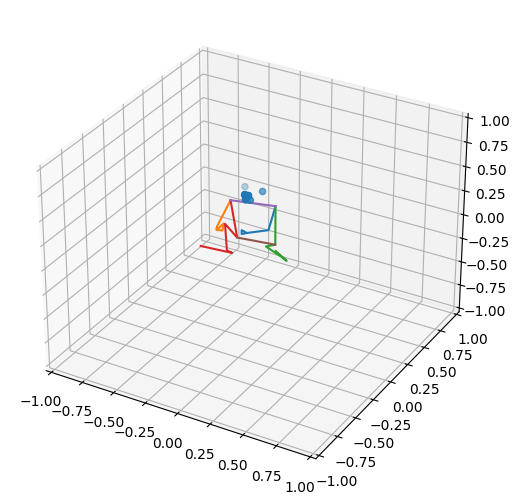

In [24]:
main()

In [111]:
plt.pause??

TESTING

In [61]:
len(landmarks_world)

33

In [24]:
landmarks

[x: 0.32242411375045776
y: 0.03175341710448265
z: 0.634011447429657
visibility: 0.8573951721191406
, x: 0.3062630295753479
y: -0.025746073573827744
z: 0.525648295879364
visibility: 0.8557844161987305
, x: 0.2984011769294739
y: -0.024586791172623634
z: 0.524969220161438
visibility: 0.8779769539833069
, x: 0.2900305390357971
y: -0.023679407313466072
z: 0.5241404175758362
visibility: 0.8769992589950562
, x: 0.335173100233078
y: -0.022510826587677002
z: 0.4899606704711914
visibility: 0.8278550505638123
, x: 0.3437851667404175
y: -0.01999983750283718
z: 0.48945918679237366
visibility: 0.8253897428512573
, x: 0.35203614830970764
y: -0.018448177725076675
z: 0.48825517296791077
visibility: 0.7980068922042847
, x: 0.2732522487640381
y: 0.012303640134632587
z: 0.1590566337108612
visibility: 0.9403833150863647
, x: 0.35640740394592285
y: 0.014638831838965416
z: 0.020203955471515656
visibility: 0.8495789766311646
, x: 0.3051098585128784
y: 0.09245616942644119
z: 0.5349031686782837
visibility: 0.92

In [15]:
for lndmrk in mp_pose.PoseLandmark:
    print(lndmrk)

PoseLandmark.NOSE
PoseLandmark.LEFT_EYE_INNER
PoseLandmark.LEFT_EYE
PoseLandmark.LEFT_EYE_OUTER
PoseLandmark.RIGHT_EYE_INNER
PoseLandmark.RIGHT_EYE
PoseLandmark.RIGHT_EYE_OUTER
PoseLandmark.LEFT_EAR
PoseLandmark.RIGHT_EAR
PoseLandmark.MOUTH_LEFT
PoseLandmark.MOUTH_RIGHT
PoseLandmark.LEFT_SHOULDER
PoseLandmark.RIGHT_SHOULDER
PoseLandmark.LEFT_ELBOW
PoseLandmark.RIGHT_ELBOW
PoseLandmark.LEFT_WRIST
PoseLandmark.RIGHT_WRIST
PoseLandmark.LEFT_PINKY
PoseLandmark.RIGHT_PINKY
PoseLandmark.LEFT_INDEX
PoseLandmark.RIGHT_INDEX
PoseLandmark.LEFT_THUMB
PoseLandmark.RIGHT_THUMB
PoseLandmark.LEFT_HIP
PoseLandmark.RIGHT_HIP
PoseLandmark.LEFT_KNEE
PoseLandmark.RIGHT_KNEE
PoseLandmark.LEFT_ANKLE
PoseLandmark.RIGHT_ANKLE
PoseLandmark.LEFT_HEEL
PoseLandmark.RIGHT_HEEL
PoseLandmark.LEFT_FOOT_INDEX
PoseLandmark.RIGHT_FOOT_INDEX


In [22]:
landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].visibility??

Object `visibility` not found.


In [121]:
plot_world_landmarks

<function __main__.plot_world_landmarks(plt, ax, landmarks, visibility_th=0.5)>

In [ ]:
def plot_world_landmarks(
    plt,
    ax,
    landmarks,
    visibility_th=0.5,
):
    landmark_point = []

    for index, landmark in enumerate(landmarks.landmark):
        landmark_point.append(
            [landmark.visibility, (landmark.x, landmark.y, landmark.z)])

    face_index_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    right_arm_index_list = [11, 13, 15, 17, 19, 21]
    left_arm_index_list = [12, 14, 16, 18, 20, 22]
    right_body_side_index_list = [11, 23, 25, 27, 29, 31]
    left_body_side_index_list = [12, 24, 26, 28, 30, 32]
    shoulder_index_list = [11, 12]
    waist_index_list = [23, 24]

    # 顔
    face_x, face_y, face_z = [], [], []
    for index in face_index_list:
        point = landmark_point[index][1]
        face_x.append(point[0])
        face_y.append(point[2])
        face_z.append(point[1] * (-1))

    # 右腕
    right_arm_x, right_arm_y, right_arm_z = [], [], []
    for index in right_arm_index_list:
        point = landmark_point[index][1]
        right_arm_x.append(point[0])
        right_arm_y.append(point[2])
        right_arm_z.append(point[1] * (-1))

    # 左腕
    left_arm_x, left_arm_y, left_arm_z = [], [], []
    for index in left_arm_index_list:
        point = landmark_point[index][1]
        left_arm_x.append(point[0])
        left_arm_y.append(point[2])
        left_arm_z.append(point[1] * (-1))

    # 右半身
    right_body_side_x, right_body_side_y, right_body_side_z = [], [], []
    for index in right_body_side_index_list:
        point = landmark_point[index][1]
        right_body_side_x.append(point[0])
        right_body_side_y.append(point[2])
        right_body_side_z.append(point[1] * (-1))

    # 左半身
    left_body_side_x, left_body_side_y, left_body_side_z = [], [], []
    for index in left_body_side_index_list:
        point = landmark_point[index][1]
        left_body_side_x.append(point[0])
        left_body_side_y.append(point[2])
        left_body_side_z.append(point[1] * (-1))

    # 肩
    shoulder_x, shoulder_y, shoulder_z = [], [], []
    for index in shoulder_index_list:
        point = landmark_point[index][1]
        shoulder_x.append(point[0])
        shoulder_y.append(point[2])
        shoulder_z.append(point[1] * (-1))

    # 腰
    waist_x, waist_y, waist_z = [], [], []
    for index in waist_index_list:
        point = landmark_point[index][1]
        waist_x.append(point[0])
        waist_y.append(point[2])
        waist_z.append(point[1] * (-1))
            
    ax.cla()
    ax.set_xlim3d(-1, 1)
    ax.set_ylim3d(-1, 1)
    ax.set_zlim3d(-1, 1)

    ax.scatter(face_x, face_y, face_z)
    ax.plot(right_arm_x, right_arm_y, right_arm_z)
    ax.plot(left_arm_x, left_arm_y, left_arm_z)
    ax.plot(right_body_side_x, right_body_side_y, right_body_side_z)
    ax.plot(left_body_side_x, left_body_side_y, left_body_side_z)
    ax.plot(shoulder_x, shoulder_y, shoulder_z)
    ax.plot(waist_x, waist_y, waist_z)
    
    plt.pause(0.01)

    return

IndexError: list index out of range

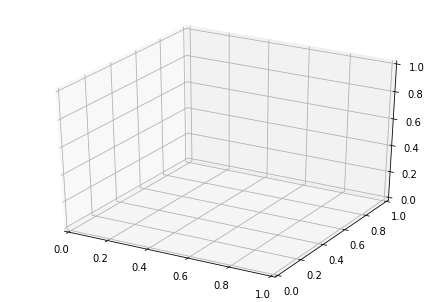

In [127]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
fig.subplots_adjust(left=0.0, right=1, bottom=0, top=1)

landmark_point = []

for index, landmark in enumerate(landmarks_world.landmark):
    landmark_point.append(
            [landmark.visibility, (landmark.x, landmark.y, landmark.z)])

    face_index_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    right_arm_index_list = [11, 13, 15, 17, 19, 21]
    left_arm_index_list = [12, 14, 16, 18, 20, 22]
    right_body_side_index_list = [11, 23, 25, 27, 29, 31]
    left_body_side_index_list = [12, 24, 26, 28, 30, 32]
    shoulder_index_list = [11, 12]
    waist_index_list = [23, 24]

    # 顔
    face_x, face_y, face_z = [], [], []
    for index in face_index_list:
        point = landmark_point[index][1]
        face_x.append(point[0])
        face_y.append(point[2])
        face_z.append(point[1] * (-1))

    # 右腕
    right_arm_x, right_arm_y, right_arm_z = [], [], []
    for index in right_arm_index_list:
        point = landmark_point[index][1]
        right_arm_x.append(point[0])
        right_arm_y.append(point[2])
        right_arm_z.append(point[1] * (-1))

    # 左腕
    left_arm_x, left_arm_y, left_arm_z = [], [], []
    for index in left_arm_index_list:
        point = landmark_point[index][1]
        left_arm_x.append(point[0])
        left_arm_y.append(point[2])
        left_arm_z.append(point[1] * (-1))

    # 右半身
    right_body_side_x, right_body_side_y, right_body_side_z = [], [], []
    for index in right_body_side_index_list:
        point = landmark_point[index][1]
        right_body_side_x.append(point[0])
        right_body_side_y.append(point[2])
        right_body_side_z.append(point[1] * (-1))

    # 左半身
    left_body_side_x, left_body_side_y, left_body_side_z = [], [], []
    for index in left_body_side_index_list:
        point = landmark_point[index][1]
        left_body_side_x.append(point[0])
        left_body_side_y.append(point[2])
        left_body_side_z.append(point[1] * (-1))

    # 肩
    shoulder_x, shoulder_y, shoulder_z = [], [], []
    for index in shoulder_index_list:
        point = landmark_point[index][1]
        shoulder_x.append(point[0])
        shoulder_y.append(point[2])
        shoulder_z.append(point[1] * (-1))

    # 腰
    waist_x, waist_y, waist_z = [], [], []
    for index in waist_index_list:
        point = landmark_point[index][1]
        waist_x.append(point[0])
        waist_y.append(point[2])
        waist_z.append(point[1] * (-1))
            
    ax.cla()
    ax.set_xlim3d(-1, 1)
    ax.set_ylim3d(-1, 1)
    ax.set_zlim3d(-1, 1)

    ax.scatter(face_x, face_y, face_z)
    ax.plot(right_arm_x, right_arm_y, right_arm_z)
    ax.plot(left_arm_x, left_arm_y, left_arm_z)
    ax.plot(right_body_side_x, right_body_side_y, right_body_side_z)
    ax.plot(left_body_side_x, left_body_side_y, left_body_side_z)
    ax.plot(shoulder_x, shoulder_y, shoulder_z)
    ax.plot(waist_x, waist_y, waist_z)
    


In [116]:
cv.putText??

In [ ]:
landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].visibility

In [27]:
mp_pose.Pose??

In [44]:
mp_drawing.DrawingSpec??

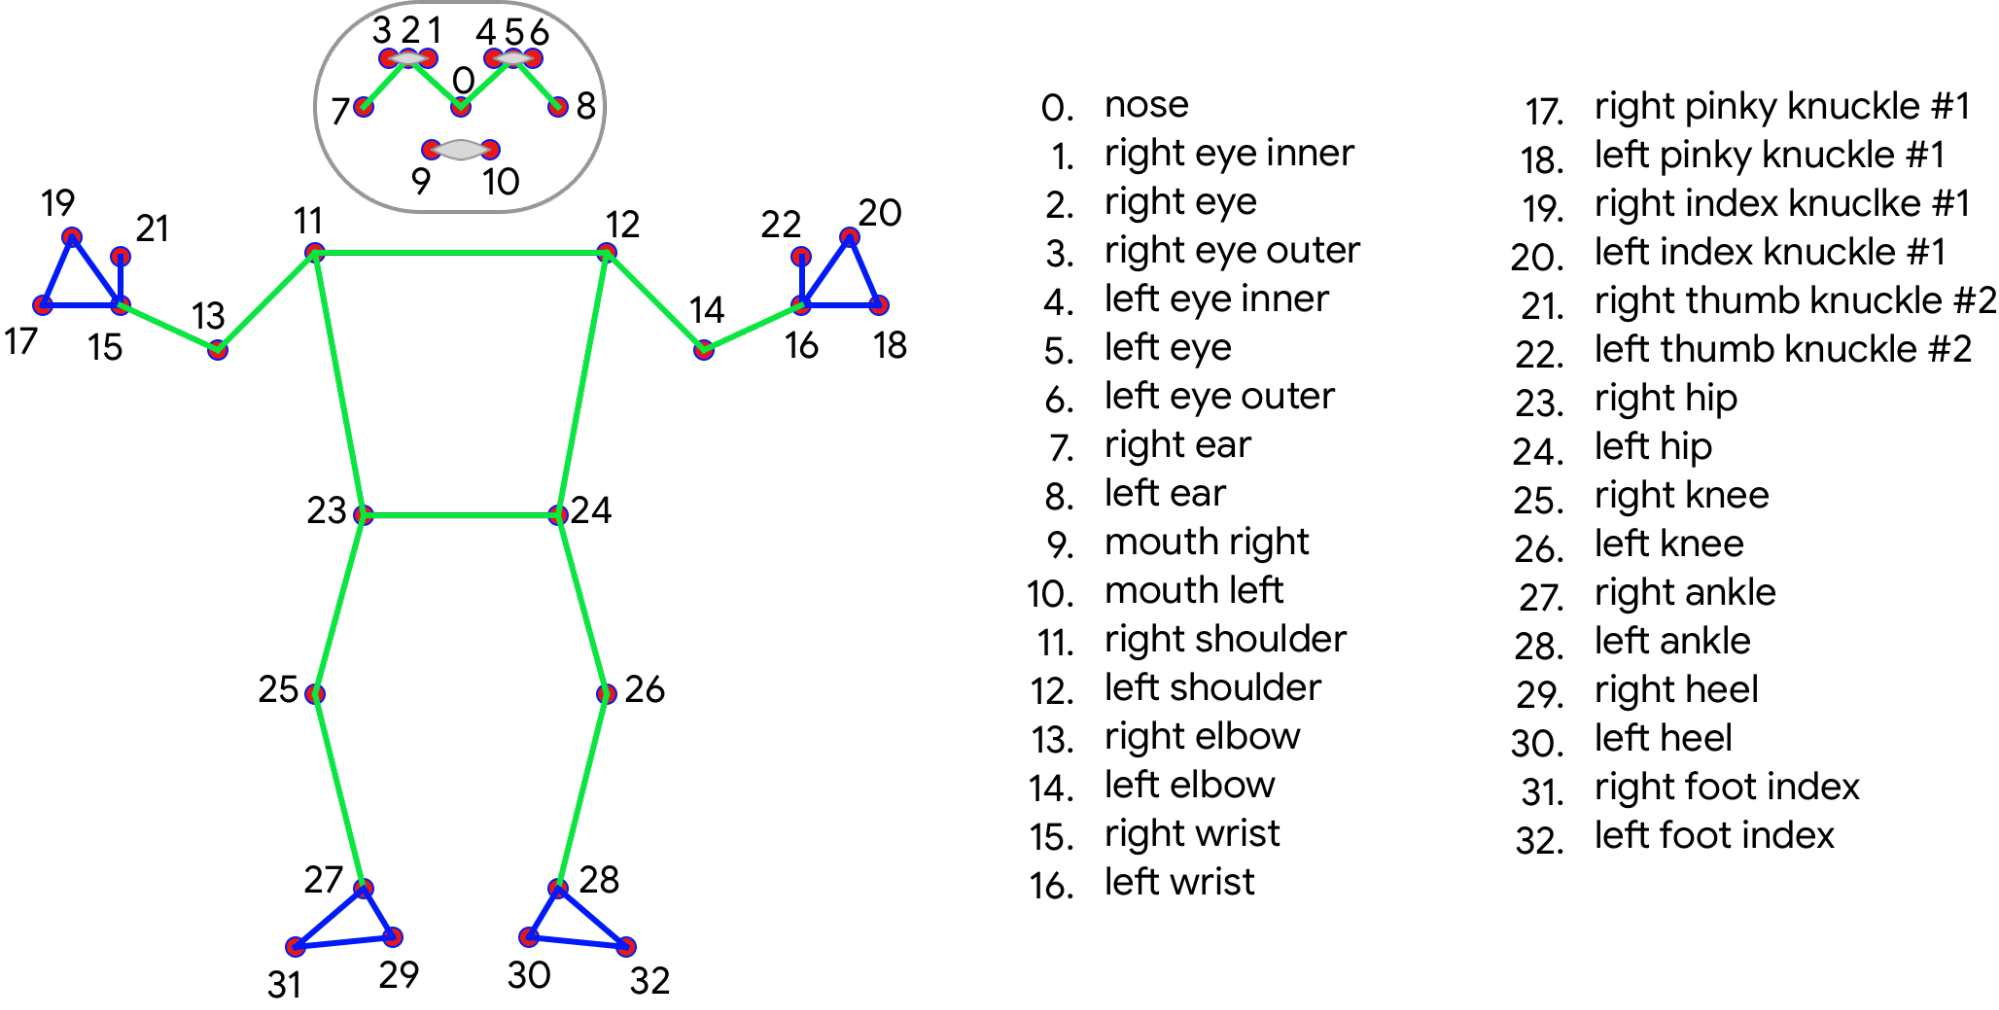

In [12]:
results.pose_landmarks.landmark??

In [40]:
cv2.imshow??

In [41]:
cv2.VideoCapture??